In [4]:
from IPython.display import Image

In [ ]:
# Confidence vs. Credibility: 

# Frequentists: consider probability as a measure of frequency out of
# repeated events. (Model parameters = fixed, data = random)
# Bayesians: consider probability as degree of certainty about values.
# (Model parameters = random, data = fixed)

In [2]:
# EXAMPLE 1 - Mean of Gaussian Distribution. (by conf/cred intervals)

# PROBLEM: observing the brightness of a star (constant brightness).
# This is num photons reaching telescope in one second. Has
# measurement errors. Observations of photons xi are drawn (say)
# from Normal distribution centered around true mean brightness
# with stddev sigma_x. 

# FIND the 95 confidence interval to place on brightness of star?

In [3]:
### 1. FREQUENTIST APPROACH:

# mean - sampling mean of the sampling distribution of the 
# observed frequency of light photons. Is normal by Central Limit 
# Theorem.
# Sampling Distribution - has mean and standard error (sigma over
# sqrt N)

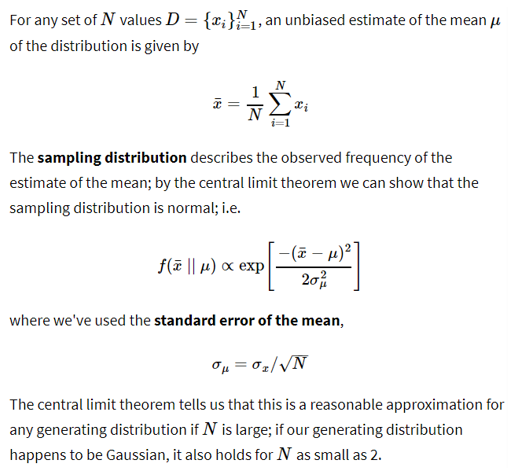

In [6]:
Image(filename="images/3_samplingdist.png")

In [9]:
# Checking CLT empirically: 

import numpy as np

N = 5
numSamples = 10**6 # of size N = 5)
sigma_x = 2 # true population standard deviation

np.random.seed(0)
x = np.random.normal(0, sigma_x, size=(numSamples, N))

mu_samp = x.mean(1)
sig_samp = sigma_x * N ** -0.5

print("Sample stderror of observed means = {0:.3f} should equal "
      "formula stdderror = {1:.3f}"
      .format(np.std(mu_samp), sig_samp))

Sample stderror of observed means = 0.894 should equal formula stdderror = 0.894


In [11]:
# now the 95% confidence interval is two standard deviations
# around the mean. 
# CI_mu = (x-bar - 2stdderror, x-bar + 2stdderror)

# suppose we have 3 observations with error (sigma_x = 10). 
# # Then the conf int is:
true_B = 100
sigma_x = 10 # true population standard deviation
np.random.seed(1)
data = np.random.normal(true_B, sigma_x, size=3)
print(data)

[ 116.24345364   93.88243586   94.71828248]


In [15]:
from scipy.special import erfinv

def frequentistConfIntTrueMean(data, sigma, level=0.95):
    """Compute confidence interval for true population mean"""
    mu = data.mean() # true mean = sampling dist mean
    sigma_mu = sigma * data.size ** -0.5 # sigma = true pop.stddev
    Nsigma = np.sqrt(2) * erfinv(level) # WHAT does this one mean?
    return mu - Nsigma * sigma_mu, mu + Nsigma * sigma_mu


print("95% confidence interval: ({0:.0f}, {1:.0f})"
      .format(*frequentistConfIntTrueMean(data, sigma_x)))

95% confidence interval: (90, 113)


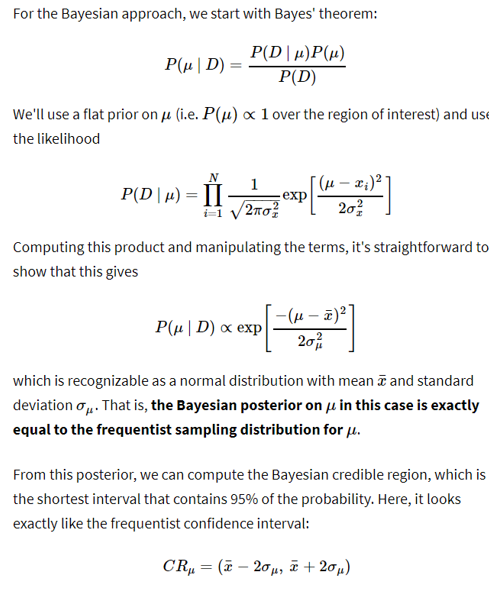

In [17]:
# 1. BAYESIAN APPROACH: for credible interval

Image(filename="images/3_bayescredibleinterval.png")

In [18]:
def bayesConfIntTrueMean(data, sigma, level=0.95):
    """Compute credible region onthe mean."""
    Nsigma = np.sqrt(2) * erfinv(level)
    mu = data.mean()
    sigma_mu = sigma * data.size ** -0.5
    
    return mu - Nsigma * sigma_mu, mu + Nsigma * sigma_mu

print("95% credible region: ({0:.0f}, {1:.0f})"
      .format(*bayesConfIntTrueMean(data, sigma_x)))

95% credible region: (90, 113)


In [19]:
# Numerically equivalent but interpretations (only) differ: 


# Bayes credible region interpretation: "Given the observed data,
# there is 95% probability that the true population mean falls within
# the credible interval". 
# --- statement of probability of parameter value given fixed bounds.

# Frequentist confidence interpretation: "There is 95% probability
# that when I compute the confidence interval from data, the
# true population mean will fall within the interval."
# --- statement is a probability about the bounds given fixed parameter.

In [ ]:
### CONFIRMING THE INTERPRETATION OF BAYES CREDIBLE REGION: 

# TODO: 
# 1. sample random mu values from the prior
# 2. sample random sets of points given each mu. 
# 3. select the points matching observed data. 
# 4. ask what fraction of the mu values are within the credible
# region we make.

In [28]:
# 0. defining quantities we need: 
Nsamples = 2E7
N = len(data)
sigma_x = 10 # population

# checking: if someone changes N, this can cause memory error:
if N * Nsamples > 1E8:
    raise ValueError("Are you sure you want this many samples?")

# epsilon says how close to the data we must be to consider it
# a matching sample. Encodes trade between bias and variance of
# the simulation. 
epsilon = 0.5 

# 1. generate mean values from the flat prior (in a reasonable range).
np.random.seed(0)
mu = 80 + 40 * np.random.random(Nsamples)


# 2. generate data for each of the mean values
x = np.random.normal(mu, sigma_x, (N, Nsamples)).transpose()

# 3. find data matching our "observed" data
x.sort(1)
data.sort()
i = np.all(abs(x - data) < epsilon, 1)
print("number of suitable samples: {0}".format(sum(i)))



# 4. ask how many of the mu's fall in the credible range
muInCredible = mu[i]
CR = bayesConfIntTrueMean(data, sigma_x)
musWithinCR = (CR[0] < muInCredible) & (muInCredible < CR[1])

print("Fraction of means in Credible Region: {0:.3f}"
      .format(sum(musWithinCR) / musWithinCR.size))

# (answer should be 0.949) - roughly 95% of mus in data match ours
# in the credible region. 

# NOTE ABOUT BAYES: we compute a "single credible region from
# observed data", and we consider it in "multiple random draws of mu." 

TypeError: 'float' object cannot be interpreted as an integer

In [30]:
### CONFIRMING INTERPRETATION OF FREQUENTIST CONFIDENCE INTERVAL: 

# 1. draw sets of values from distribution defined by true mean. 
# 2. for each set of values, compute new confint. 
# 3. determine what frac of this intervals contain mu. 

# 0. define quantities
N = len(data)
Nsamples = 1E4
mu = 100
sigma_x = 10


# 1. draw data sets from true distribution
np.random.seed(0)
x = np.random.normal(mu, sigma_x, (Nsamples, N))

# 2. compute confi int for each datasaet
CIs = np.array([frequentistConfIntTrueMean(Di, sigma_x) for Di in x])

# 3. find which confints contain true mean
musWithinCR = (CIs[:, 0] < mu) & (mu < CIs[:, 1])

print("Fraction of Confidence Intervals containing the mean: {0:.3f}"\
    .format(sum(musWithinCR) / musWithinCR.size))


# NOTE about frequentist: single value true mean and consider it
# in relation to multiple confints made from multiple random
# data samples.

TypeError: 'float' object cannot be interpreted as an integer

In [32]:
## OVERALL:

# Bayes approach fixes the region + guarantees 95% of mus fall
# within it. 
# Frequentist approach fixes the parameter + guarantees 95% of
# confints will contain it. 

# MEANING:

# Bayes treats parameters (mu) as random variables
# FREQ treats parameters fixed. 

# Bayes treats observed data fixed 
# FREQ treats data as random variables. 

# Bayes treats parameter contrains (CR) fixed
# Freq treats constraints as random variables. 

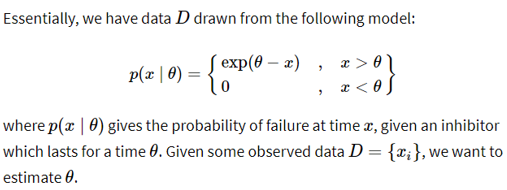

In [34]:
## Example 2: Jaynes' Truncated Exponential

# (example where bayes credible interval and frequentist interval
# do not overlap)

# PROBLEM: Device will operate without failure for a time theta because
# of a protective chemical inhibitor injected into it; but at time
# theta, the supply is exhausted and failure then commences, 
# following the exponential failure law. Not feasible to observe the
# depletion of this inhibitor directly; one can only observed the
# resulting failures. From data on actual failure times, estimate the
# time theta of guaranteed safe operation...

Image(filename="images/3_example2.png")

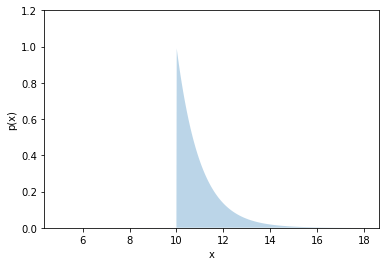

In [35]:
# plotting the model for a particular theta

%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

def p(x, theta):
    return (x > theta) * np.exp(theta - x)

x = np.linspace(5, 18, 1000)
plt.gcf().set_facecolor("white")
plt.fill(x, p(x, 10), alpha=0.3)
plt.ylim(0, 1.2)
plt.xlabel('x')
plt.ylabel('p(x)')

In [ ]:
# Given this observed data of failure times: D = {10, 12, 15}
# ...infer the true theta. 

In [ ]:
# APPROACH 1: COMMON SENSE: 

# observe that theta must be smaller than the smallest observed value 
# (because failure only happens after chemical is absorbed). 
# Then: theta < min(D) => theta < 10

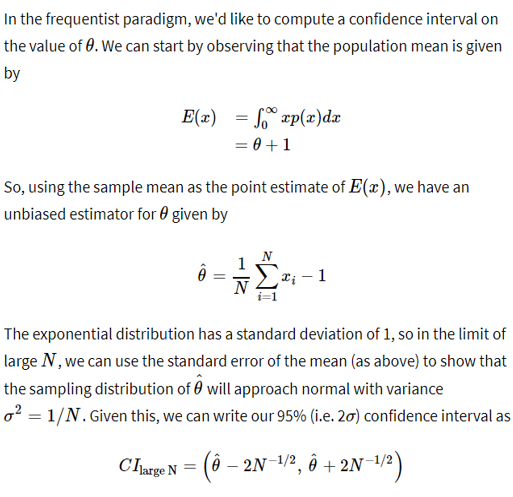

In [36]:
# APPROACH 2: Frequentist 1 - sampling distr via normal approximation

Image(filename="images/3_freq1.png")

In [37]:
from scipy.special import erfinv 

def approximateCI(D, sigma=0.95):
    """Approximate truncated exponential confidence interval."""
    # use erfinv to convert percentage to number of sigma
    Nsigma = np.sqrt(2) * erfinv(sigma)
    D = np.asarray(D)
    N = D.size 
    theta_hat = np.mean(D) - 1 
    
    return [theta_hat - Nsigma / np.sqrt(N), 
            theta_hat + Nsigma / np.sqrt(N)]

D = [10, 12, 15]
print("approximate CI: ({0:.1f}, {1:.1f})".format(*approximateCI(D)))



# Observe - this violates that theta must be < 10. So use exact
# samplign distribution

approximate CI: (10.2, 12.5)


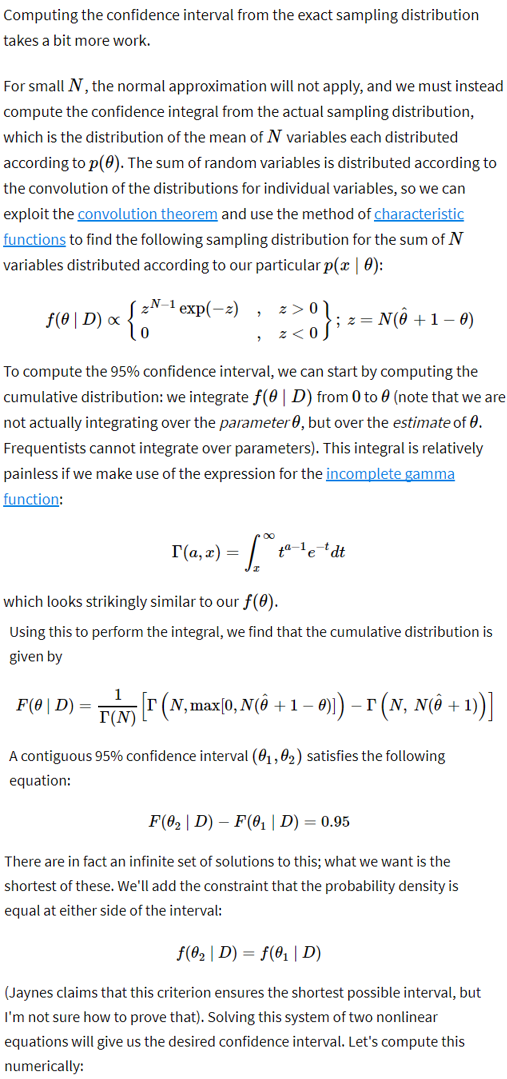

In [38]:
# APPROACH 3: Frequentist - Exact sampling distribution

Image(filename="images/3_freq2.png")

In [40]:
from scipy.special import gammaincc 
from scipy import optimize 

def exactCI(D, level=0.95):
    """Exact truncated exponential confidence interval. """
    D = np.asarray(D)
    N = D.size 
    theta_hat = np.mean(D) - 1
    
    def f(theta, D):
        z = theta_hat + 1 - theta 
        return (z > 0) * z ** (N-1) * np.exp(-N*z)
    
    def F(theta, D):
        return gammaincc(N, 
                         np.maximum(0, N * (theta_hat + 1 - theta))) \
               - gammaincc(N, N * (theta_hat + 1))
    
    
    def eqns(CI, D): 
        """Equations which should be equal to zero"""
        theta1, theta2 = CI
        return (F(theta2, D) - F(theta1, D) - level, 
                f(theta2, D) - f(theta1, D))
    
    
    
    # function exact CI: 
    guess = approximateCI(D, 0.68) # use 1-sigma interval as guess
    result = optimize.root(eqns, guess, args=(D,))
    if not result.success:
        print("warning: CI result did not converge!")
        
    return result.x

In [41]:
# sanity check: making sure exact and appriximate intervals match
# for large num of points: 

np.random.seed(0)
Dlarge = 10 + np.random.random(500)
print("approx: ({0:.3f}, {1:.3f})".format(*approximateCI(Dlarge)))
print("exact: ({0:.3f}, {1:.3f})".format(*exactCI(Dlarge)))



# Observe: YAY they are very close for large number of N

approx: (9.409, 9.584)
exact: (9.408, 9.584)


In [42]:
# Results for the 3-point data set:
print("approximate CI: ({0:.1f}, {1:.1f})".format(*approximateCI(D)))
print("exact CI:       ({0:.1f}, {1:.1f})".format(*exactCI(D)))


# Observe: still the same problem: theta < 10 but here
# this is way higher. 

# Can bayes do better?

approximate CI: (10.2, 12.5)
exact CI:       (10.2, 12.2)


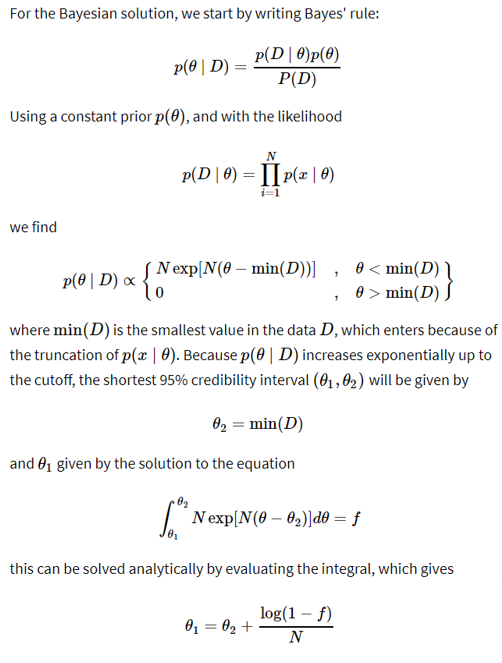

In [43]:
# APPROACH 4: BAYES CREDIBILITY INTERVAL

Image(filename="images/3_bayes1.png")

In [44]:
def bayesCR(D, level=0.95):
    """Bayesian credibility region"""
    D = np.asarray(D) 
    N = float(D.size)
    theta2=D.min()
    theta1 = theta2 + np.log(1. - level) / N 
    return theta1, theta2

In [45]:
# COMPARING THE FOUR METHODS: 

print("common sense:         theta < {0:.1f}".format(np.min(D)))
print("frequentism (approx): 95% CI = ({0:.1f}, {1:.1f})"
      .format(*approximateCI(D)))
print("frequentism (exact):  95% CI = ({0:.1f}, {1:.1f})"
      .format(*exactCI(D)))
print("Bayesian:             95% CR = ({0:.1f}, {1:.1f})"
      .format(*bayesCR(D)))

# Observe: bayesian is the only correct one. 

common sense:         theta < 10.0
frequentism (approx): 95% CI = (10.2, 12.5)
frequentism (exact):  95% CI = (10.2, 12.2)
Bayesian:             95% CR = (9.0, 10.0)


In [46]:
# APPROACH 5: NUMERICAL CONFIRMATION:

from scipy.stats import expon 

Nsamples = 1000
N = 3
theta = 10 # assuming true value for theta

np.random.seed(42)
data = expon(theta).rvs((Nsamples, N))
CIs = np.array([exactCI(Di) for Di in data])

# find which confints contain the mean
confintsThatContainMean = (CIs[:, 0] < theta) & (theta < CIs[:, 1])

print("Fraction of Confidence Intervals containing theta: {0:.3f}"
      .format(sum(confintsThatContainMean) / 
              confintsThatContainMean.size))


# Observe: see? 95 % of intervals contain the true value. 
# Note: we know from the data that we are in the 5% situation
# where the Ci fails. So the fact that standard frequentist intervals
# ignore this common-sense info is not good. 

Fraction of Confidence Intervals containing theta: 0.953


In [47]:
# Check bayesian passes the test
np.random.seed(42)
N = 1E7 
epsilon = 0.1

theta = 9 + 2*np.random.random(N)
data = (theta + expon().rvs((3, N))).transpose()
data.sort(1)
D.sort()
samplesContainingTheta = np.all(abs(data - D) < epsilon, 1)

print("Number of good samples: {0}".format(sum(samplesContainingTheta)))

# (should be 65 samples)

TypeError: 'float' object cannot be interpreted as an integer

In [48]:
theta_good = theta[samplesContainingTheta]
theta1, theta2 = bayesCR(D)

within_CR = (theta1 < theta_good) & (theta_good < theta2)
print("Fraction of thetas in Credible Region: {0:.3f}"
      .format(sum(within_CR) / within_CR.size))

# result should be 0.854

NameError: name 'samplesContainingTheta' is not defined

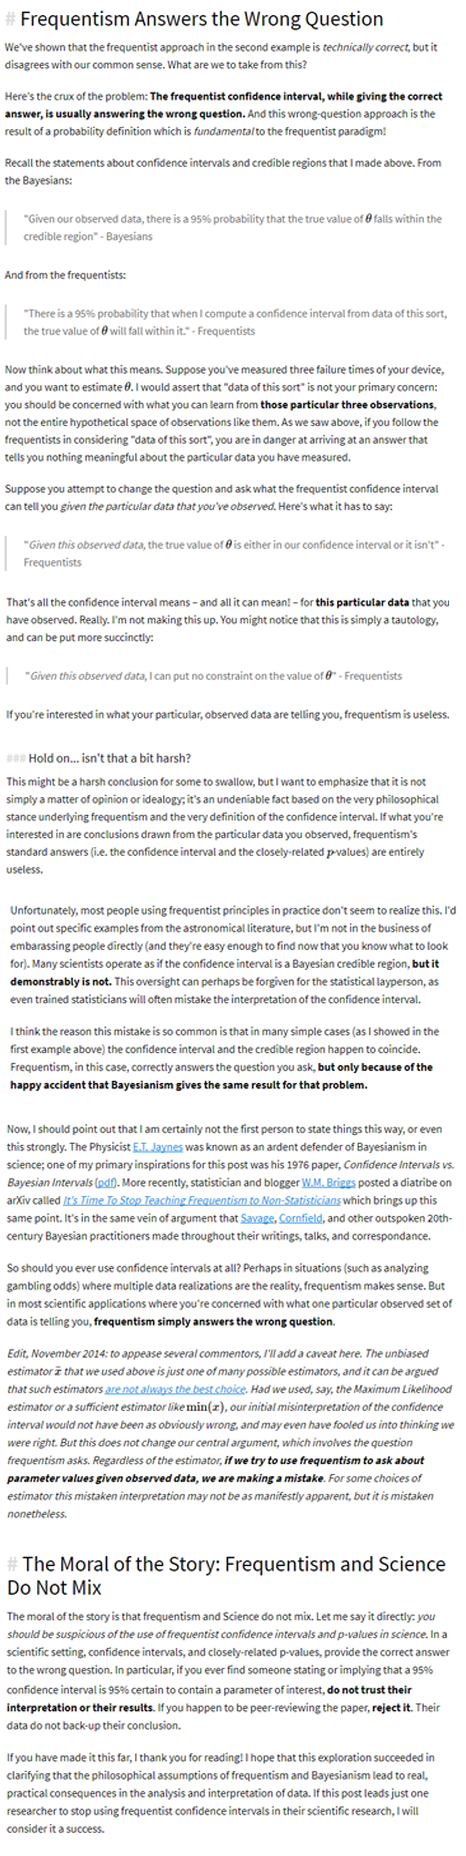

In [55]:
Image(filename="images/3_word.png")